In [1]:
import matplotlib.pyplot as plt 
import lasio as ls 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np

In [2]:
las=ls.read("Pluto-3ST1_PEX-HRLA_s1r2_main pass.las")

In [3]:
a=las.curves
print(a)

Mnemonic  Unit  Value         Description                                                     
--------  ----  -----         -----------                                                     
DEPT      M     00 001 00 00  0  Depth                                                        
DF        N     00 000 00 00  1  Uncalibrated Downhole Force {F13.4}                          
DSO8      IN    00 000 00 00  2  HRDD HiRes Density Standoff {F13.4}                          
EHGR      GAPI  00 000 00 00  3  HiRes Gamma-Ray {F13.4}                                      
HCAL      IN    70 280 00 01  4  HRCC Cal. Caliper {F13.4}                                    
HDRA      G/C3  45 356 01 01  5  HRDD Density Correction {F13.4}                              
HPRA            00 000 00 00  6  HRDD Photoelectric Factor Correction {F13.4}                 
HTNP      V/V   00 000 00 00  7  HiRes Thermal Neutron Porosity {F13.4}                       
NPHI      V/V   42 890 01 01  8  Thermal Neutron P

In [4]:
las.curves

[CurveItem(mnemonic="DEPT", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPT", data.shape=(8650,)),
 CurveItem(mnemonic="DF", unit="N", value="00 000 00 00", descr="1  Uncalibrated Downhole Force {F13.4}", original_mnemonic="DF", data.shape=(8650,)),
 CurveItem(mnemonic="DSO8", unit="IN", value="00 000 00 00", descr="2  HRDD HiRes Density Standoff {F13.4}", original_mnemonic="DSO8", data.shape=(8650,)),
 CurveItem(mnemonic="EHGR", unit="GAPI", value="00 000 00 00", descr="3  HiRes Gamma-Ray {F13.4}", original_mnemonic="EHGR", data.shape=(8650,)),
 CurveItem(mnemonic="HCAL", unit="IN", value="70 280 00 01", descr="4  HRCC Cal. Caliper {F13.4}", original_mnemonic="HCAL", data.shape=(8650,)),
 CurveItem(mnemonic="HDRA", unit="G/C3", value="45 356 01 01", descr="5  HRDD Density Correction {F13.4}", original_mnemonic="HDRA", data.shape=(8650,)),
 CurveItem(mnemonic="HPRA", unit="", value="00 000 00 00", descr="6  HRDD Photoelectric Factor Correction {F13.4}", origin

In [5]:
las.data
ls_data=las.data
print(ls_data)

[[ 2.2110192e+03  7.7122090e+03  4.5890000e-01 ...  3.0300000e-02
  -1.1968750e+02  3.8530000e+03]
 [ 2.2111716e+03  7.9351780e+03  4.5890000e-01 ...  3.0200000e-02
  -1.2131250e+02  3.7860000e+03]
 [ 2.2113240e+03  7.6046780e+03  4.5890000e-01 ...  3.0300000e-02
  -1.2068750e+02  3.7610000e+03]
 ...
 [ 3.5288220e+03  4.0498190e+03            nan ...  1.2420000e-01
  -1.8906250e+02  3.7400000e+03]
 [ 3.5289744e+03  4.0514000e+03            nan ...  1.2430000e-01
  -1.8962500e+02  3.7160000e+03]
 [ 3.5291268e+03  4.0608880e+03            nan ...  1.2610000e-01
  -1.8893750e+02  3.6580000e+03]]


In [6]:
# convert to a pandas dataframe as it makes exploratory data analysis easier
data1=las.df()
print(data1)

                 DF    DSO8      EHGR    HCAL    HDRA     HPRA    HTNP   
DEPT                                                                     
2211.0192  7712.209  0.4589   23.7245  4.0414  0.3075 -12.7413  0.5182  \
2211.1716  7935.178  0.4589   24.8292  4.0263  0.3075 -12.7413  0.5182   
2211.3240  7604.678  0.4589   22.8066  4.0490  0.3075 -12.7413  0.5308   
2211.4764  7576.213  0.4589   23.7020  4.0490  0.3075 -12.7413  0.6409   
2211.6288  7683.745  0.4589   23.9977  4.0339  0.3075 -12.7413  0.7063   
...             ...     ...       ...     ...     ...      ...     ...   
3528.5172  4041.912     NaN  169.8639  3.9658     NaN      NaN  0.4502   
3528.6696  4045.075     NaN  169.8639  3.9658     NaN      NaN  0.4502   
3528.8220  4049.819     NaN  169.8639  3.9658     NaN      NaN  0.4502   
3528.9744  4051.400     NaN  169.8639  3.9658     NaN      NaN  0.4502   
3529.1268  4060.888     NaN  169.8639  3.9658     NaN      NaN  0.4502   

             NPHI    PEF8    RHO8  ..

In [7]:
#Now extract the columns of the data(Description of the column)
data1.columns

Index(['DF', 'DSO8', 'EHGR', 'HCAL', 'HDRA', 'HPRA', 'HTNP', 'NPHI', 'PEF8',
       'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 'RM_HRLT', 'RSO8',
       'RT_HRLT', 'RXO8', 'SP', 'TENS'],
      dtype='object')

In [8]:
# We need to reset index to make depth as column 
data2=data1.reset_index()

In [9]:
# recheck following reset of index about data column and you can observe 'DEPTH:1' is inside the columns
data2.columns

Index(['DEPT', 'DF', 'DSO8', 'EHGR', 'HCAL', 'HDRA', 'HPRA', 'HTNP', 'NPHI',
       'PEF8', 'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 'RM_HRLT',
       'RSO8', 'RT_HRLT', 'RXO8', 'SP', 'TENS'],
      dtype='object')

In [10]:
# rename any of the header definination -  standard header name is helpful for interpretation.
data2=data2.rename(columns=({'DEPT':"Depth","HCAL":"CAL"}))

In [11]:
data2.columns

Index(['Depth', 'DF', 'DSO8', 'EHGR', 'CAL', 'HDRA', 'HPRA', 'HTNP', 'NPHI',
       'PEF8', 'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 'RM_HRLT',
       'RSO8', 'RT_HRLT', 'RXO8', 'SP', 'TENS'],
      dtype='object')

In [12]:
print(data2)

          Depth        DF    DSO8      EHGR     CAL    HDRA     HPRA    HTNP   
0     2211.0192  7712.209  0.4589   23.7245  4.0414  0.3075 -12.7413  0.5182  \
1     2211.1716  7935.178  0.4589   24.8292  4.0263  0.3075 -12.7413  0.5182   
2     2211.3240  7604.678  0.4589   22.8066  4.0490  0.3075 -12.7413  0.5308   
3     2211.4764  7576.213  0.4589   23.7020  4.0490  0.3075 -12.7413  0.6409   
4     2211.6288  7683.745  0.4589   23.9977  4.0339  0.3075 -12.7413  0.7063   
...         ...       ...     ...       ...     ...     ...      ...     ...   
8645  3528.5172  4041.912     NaN  169.8639  3.9658     NaN      NaN  0.4502   
8646  3528.6696  4045.075     NaN  169.8639  3.9658     NaN      NaN  0.4502   
8647  3528.8220  4049.819     NaN  169.8639  3.9658     NaN      NaN  0.4502   
8648  3528.9744  4051.400     NaN  169.8639  3.9658     NaN      NaN  0.4502   
8649  3529.1268  4060.888     NaN  169.8639  3.9658     NaN      NaN  0.4502   

        NPHI    PEF8  ...    RLA2    RL

In [13]:
#statistics of the dataframe, here dataframe name is - data2

data2.describe()

,Depth,DF,DSO8,EHGR,CAL,HDRA,HPRA,HTNP,NPHI,PEF8,...,RLA2,RLA3,RLA4,RLA5,RM_HRLT,RSO8,RT_HRLT,RXO8,SP,TENS
count,8650.000000,8650.000000,8640.000000,8650.000000,8650.000000,8640.000000,8640.000000,8650.000000,8650.000000,8640.000000,...,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000
mean,2870.073000,6752.843268,0.113149,90.293294,8.423138,0.014306,-0.355922,0.342509,0.295418,3.968288,...,246.246139,258.752571,282.683965,919.665889,0.032419,0.028081,921.559466,2.013438,-188.236395,4377.260231
std,380.570879,313.645269,0.124872,45.176994,0.742713,0.099695,1.430133,0.086935,0.073594,1.021895,...,4921.398159,5036.989866,5260.521357,9513.350090,0.006952,0.066464,9513.849059,8.368712,24.160933,454.548812
min,2211.019200,4041.912000,0.000000,19.636300,3.950700,-0.626300,-15.489300,0.018700,0.005100,0.900000,...,0.000200,0.000100,0.000300,0.000100,0.002500,0.000000,0.000100,0.030000,-218.875000,3503.000000
25%,2540.546100,6593.014250,0.016675,55.865675,8.220400,-0.005200,-0.030600,0.282900,0.245000,3.244975,...,1.005100,1.030550,1.037275,1.081075,0.028000,0.000000,1.102975,0.760750,-207.437500,4004.000000
50%,2870.073000,6703.313000,0.062800,74.630950,8.538100,-0.001300,0.057900,0.336550,0.292300,3.889650,...,1.312700,1.344500,1.352600,1.413350,0.032300,0.000000,1.467400,1.245850,-197.125000,4441.000000
75%,3199.599900,6877.260000,0.180700,119.371300,8.708300,0.004200,0.116600,0.399900,0.346200,4.556225,...,2.163050,2.226775,2.245225,2.367000,0.038400,0.021200,2.491775,1.808225,-175.640625,4731.000000
max,3529.126800,9132.254000,0.766600,352.151600,12.111900,1.983500,3.704700,0.924000,0.668300,10.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,0.052800,0.800000,100000.000000,365.581300,-118.500000,5301.000000


Histogram plot of different log curves 

Text(0.5, 1.0, 'Plot of RH08 Vs Frequency')

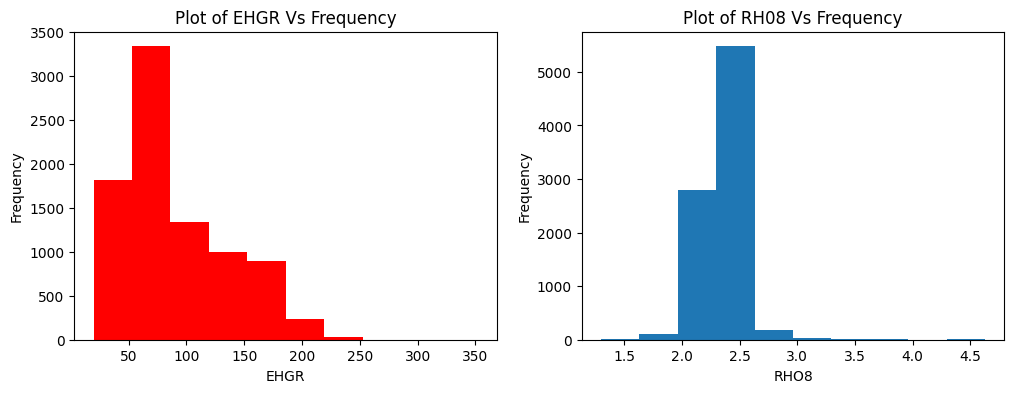

In [14]:
#script to plot histogram of EHGR and RHO8 log (default type of plot)
#Also drop any nan value during histogram plot 
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(data2.EHGR.dropna(),color="red")
plt.xlabel('EHGR')
plt.ylabel('Frequency')
plt.title("Plot of EHGR Vs Frequency")

plt.subplot(122)
plt.hist(data2.RHO8.dropna())
plt.xlabel('RHO8')
plt.ylabel('Frequency')
plt.title("Plot of RH08 Vs Frequency")

<Axes: ylabel='Frequency'>

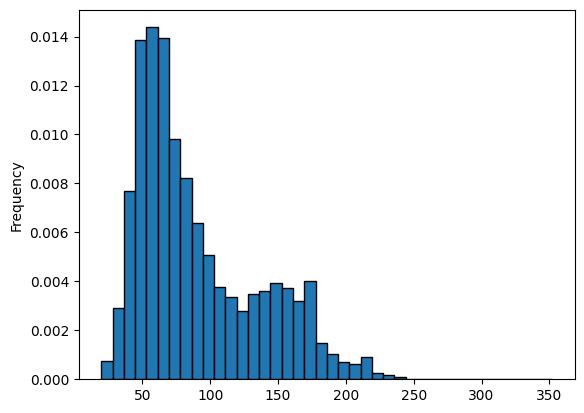

In [15]:
# histogram plot with user modified bin size, colour, etc 
data2['EHGR'].plot(kind='hist', bins=40, density=True, edgecolor='black')

Mean value is:	 90.29329430057803,
 p5 value is:	 39.445345,
 and p95 values are:	 173.80795999999995


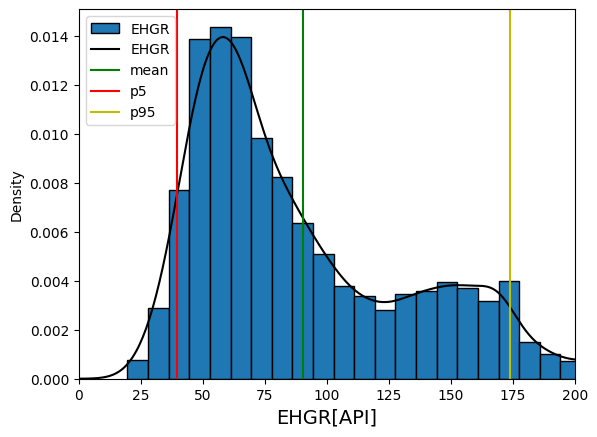

In [16]:
# Another way to display histogram with percentile, mean, and probability distribution function
# Kernel density estimation (KDE) is a non-parametric method for 
# estimating the probability density function of a given random variable
data2['EHGR'].plot(kind='hist', bins=40, density=True,edgecolor='black')
data2['EHGR'].plot(kind='kde',color='black')
plt.xlabel('EHGR[API]', fontsize=14)
#Mean of the EHGR
mean=data2['EHGR'].mean()
#Calculating percentage of the EHGR
p05=data2.EHGR.quantile(0.05)
p95=data2.EHGR.quantile(0.95)
#Add vertical line on x-axis
plt.axvline(mean,color='g',label='mean')
plt.axvline(p05,color='r',label='p5')
plt.axvline(p95,color='y',label='p95')
plt.legend()
plt.xlim(0,200)
print(f'Mean value is:\t {mean},\n p5 value is:\t {p05},\n and p95 values are:\t {p95}')

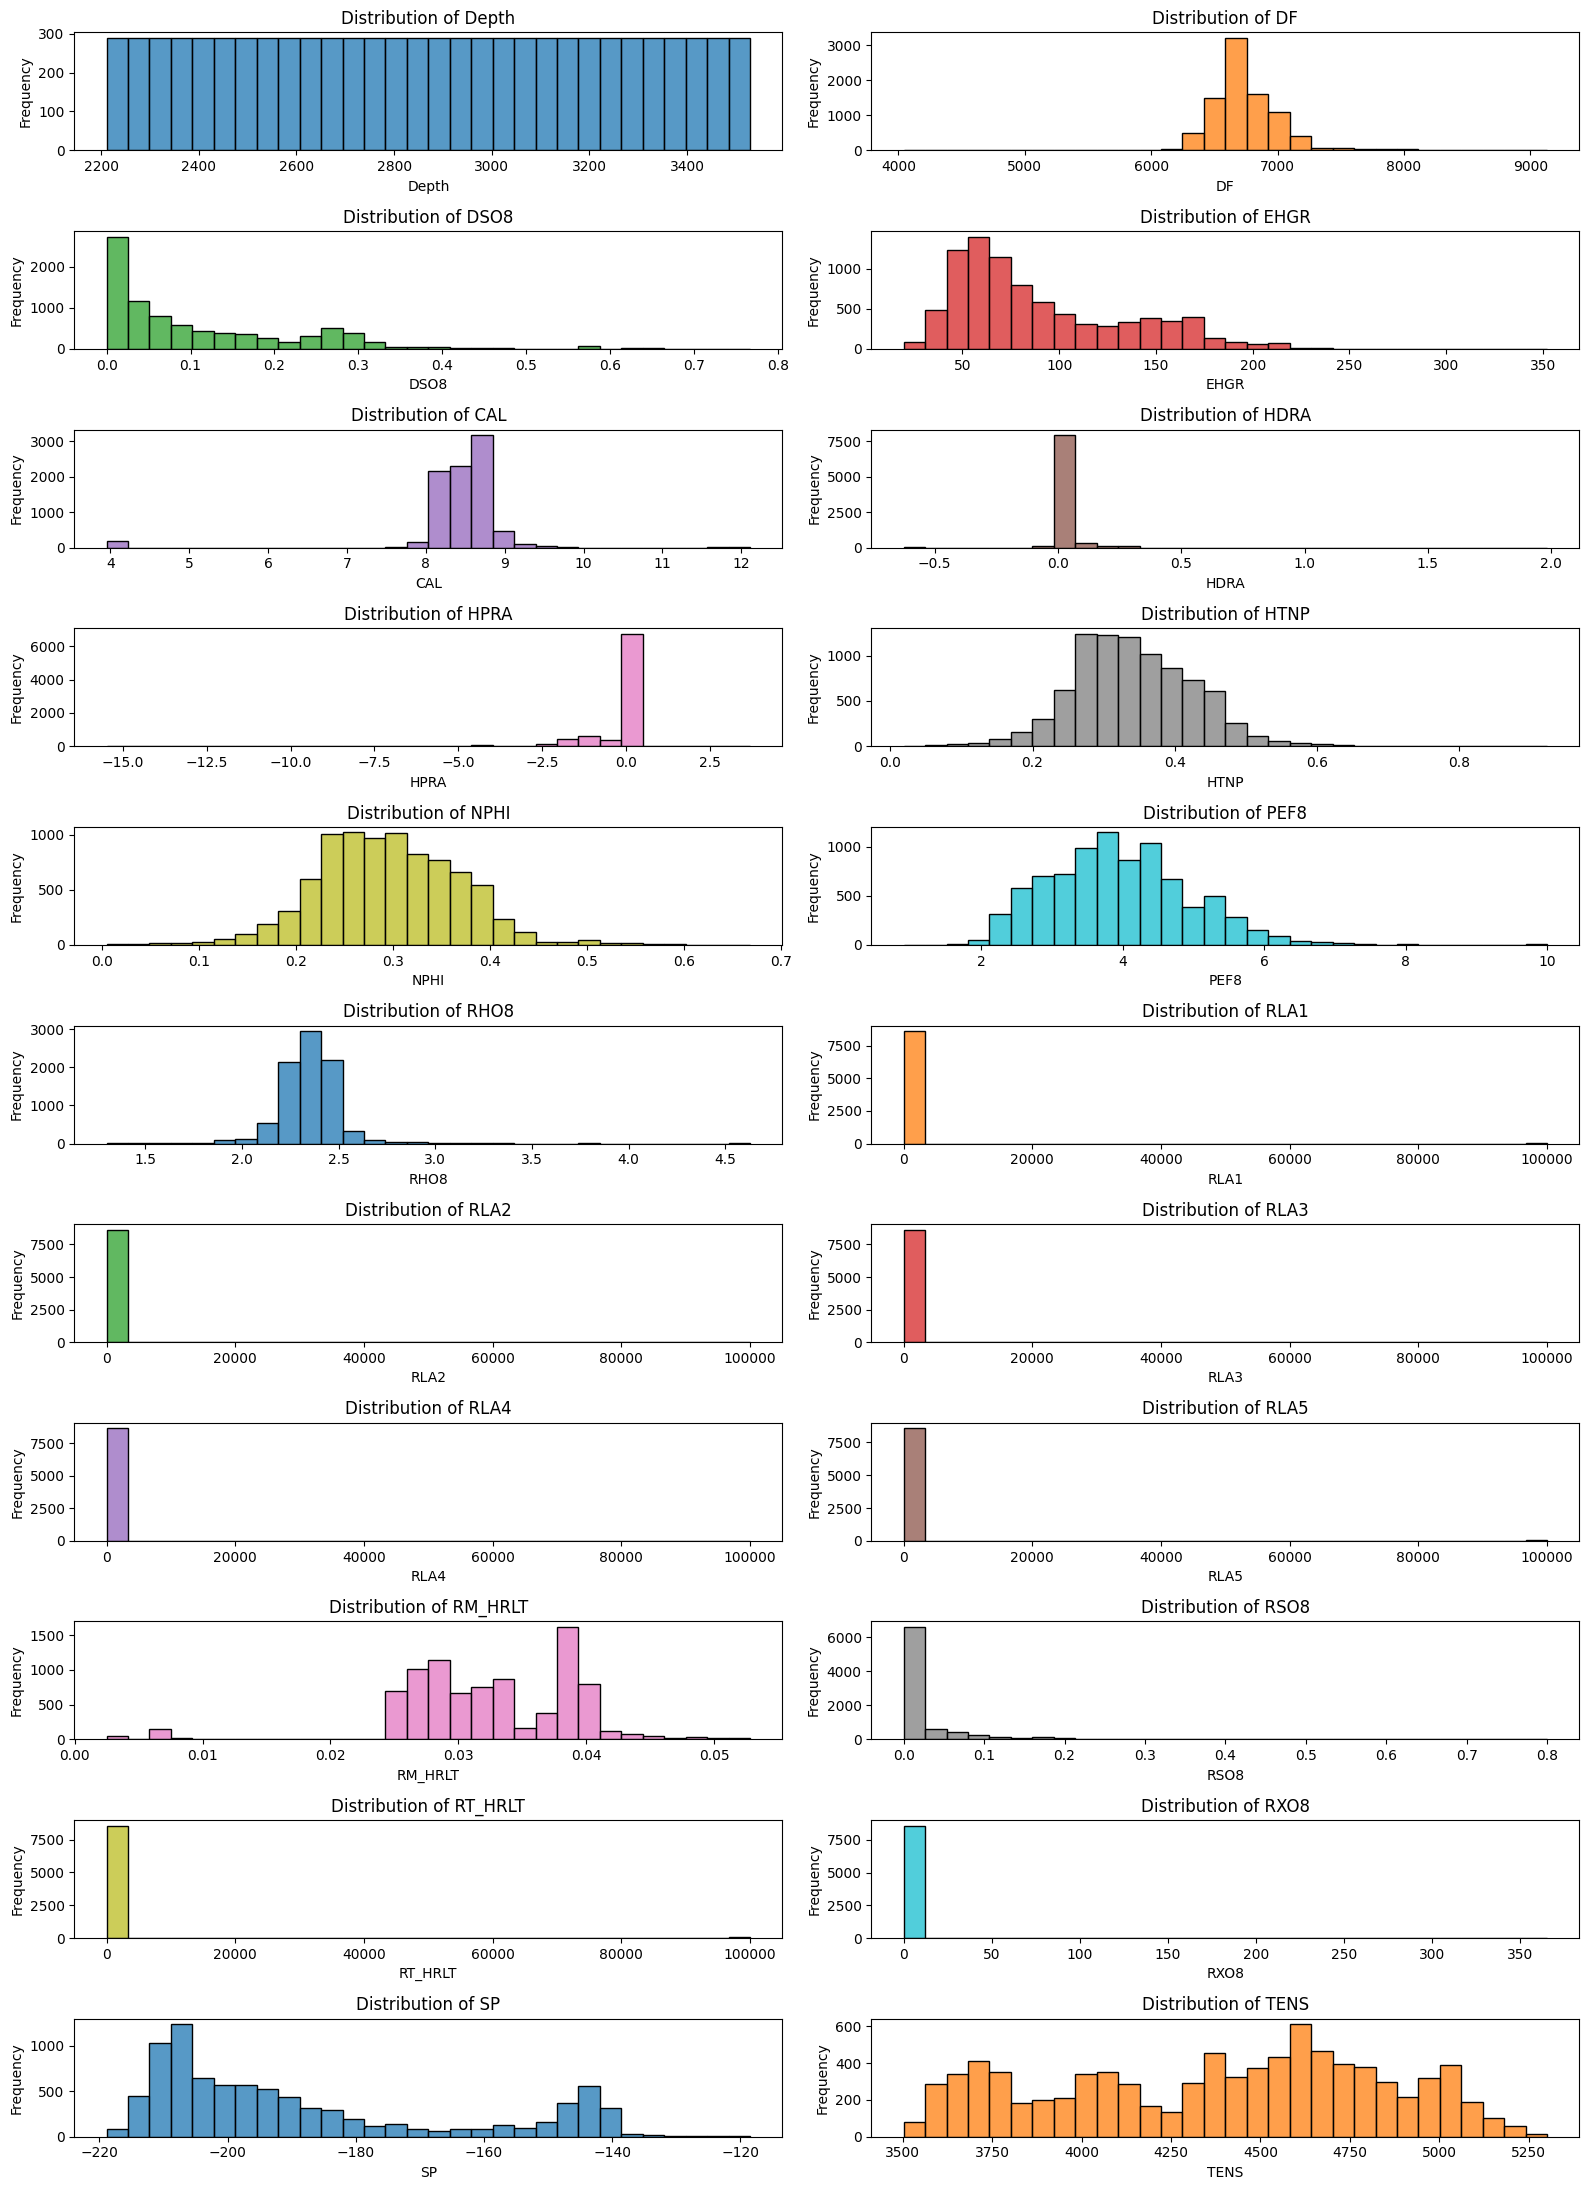

In [17]:
#Now plot each of the columns separately
#Plotting of the all the possible data

# Set up figure and axes
num_columns = len(data2.columns)
num_rows = int(np.ceil(num_columns / 2))  # Two columns per row

plt.figure(figsize=(16, 2.0* num_rows))

colors = sns.color_palette()

# Plot each column with a different color
for i, column in enumerate(data2.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(data2[column].dropna(), bins=30,color=colors[i % len(colors)])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [18]:
data2.head()

,Depth,DF,DSO8,EHGR,CAL,HDRA,HPRA,HTNP,NPHI,PEF8,...,RLA2,RLA3,RLA4,RLA5,RM_HRLT,RSO8,RT_HRLT,RXO8,SP,TENS
0,2211.0192,7712.209,0.4589,23.7245,4.0414,0.3075,-12.7413,0.5182,0.4972,7.2643,...,0.0052,0.0038,0.0024,100000.0,0.0026,0.1,100000.0,0.0303,-119.6875,3853.0
1,2211.1716,7935.178,0.4589,24.8292,4.0263,0.3075,-12.7413,0.5182,0.4972,7.2643,...,0.0052,0.0038,0.0024,100000.0,0.0026,0.1,100000.0,0.0302,-121.3125,3786.0
2,2211.3240,7604.678,0.4589,22.8066,4.0490,0.3075,-12.7413,0.5308,0.5498,7.2643,...,0.0052,0.0038,0.0024,100000.0,0.0026,0.1,100000.0,0.0303,-120.6875,3761.0
3,2211.4764,7576.213,0.4589,23.7020,4.0490,0.3075,-12.7413,0.6409,0.5887,7.2643,...,0.0060,0.0047,0.0032,100000.0,0.0026,0.1,100000.0,0.0302,-119.5625,3783.0
4,2211.6288,7683.745,0.4589,23.9977,4.0339,0.3075,-12.7413,0.7063,0.5822,7.2643,...,0.0053,0.0039,0.0023,100000.0,0.0026,0.1,100000.0,0.0301,-118.5000,3717.0


In [19]:
data2.columns

Index(['Depth', 'DF', 'DSO8', 'EHGR', 'CAL', 'HDRA', 'HPRA', 'HTNP', 'NPHI',
       'PEF8', 'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 'RM_HRLT',
       'RSO8', 'RT_HRLT', 'RXO8', 'SP', 'TENS'],
      dtype='object')

In [20]:
data2.describe()

,Depth,DF,DSO8,EHGR,CAL,HDRA,HPRA,HTNP,NPHI,PEF8,...,RLA2,RLA3,RLA4,RLA5,RM_HRLT,RSO8,RT_HRLT,RXO8,SP,TENS
count,8650.000000,8650.000000,8640.000000,8650.000000,8650.000000,8640.000000,8640.000000,8650.000000,8650.000000,8640.000000,...,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000
mean,2870.073000,6752.843268,0.113149,90.293294,8.423138,0.014306,-0.355922,0.342509,0.295418,3.968288,...,246.246139,258.752571,282.683965,919.665889,0.032419,0.028081,921.559466,2.013438,-188.236395,4377.260231
std,380.570879,313.645269,0.124872,45.176994,0.742713,0.099695,1.430133,0.086935,0.073594,1.021895,...,4921.398159,5036.989866,5260.521357,9513.350090,0.006952,0.066464,9513.849059,8.368712,24.160933,454.548812
min,2211.019200,4041.912000,0.000000,19.636300,3.950700,-0.626300,-15.489300,0.018700,0.005100,0.900000,...,0.000200,0.000100,0.000300,0.000100,0.002500,0.000000,0.000100,0.030000,-218.875000,3503.000000
25%,2540.546100,6593.014250,0.016675,55.865675,8.220400,-0.005200,-0.030600,0.282900,0.245000,3.244975,...,1.005100,1.030550,1.037275,1.081075,0.028000,0.000000,1.102975,0.760750,-207.437500,4004.000000
50%,2870.073000,6703.313000,0.062800,74.630950,8.538100,-0.001300,0.057900,0.336550,0.292300,3.889650,...,1.312700,1.344500,1.352600,1.413350,0.032300,0.000000,1.467400,1.245850,-197.125000,4441.000000
75%,3199.599900,6877.260000,0.180700,119.371300,8.708300,0.004200,0.116600,0.399900,0.346200,4.556225,...,2.163050,2.226775,2.245225,2.367000,0.038400,0.021200,2.491775,1.808225,-175.640625,4731.000000
max,3529.126800,9132.254000,0.766600,352.151600,12.111900,1.983500,3.704700,0.924000,0.668300,10.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,0.052800,0.800000,100000.000000,365.581300,-118.500000,5301.000000


(array([1.814e+03, 3.335e+03, 1.339e+03, 9.940e+02, 8.920e+02, 2.350e+02,
        3.600e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 19.6363 ,  52.88783,  86.13936, 119.39089, 152.64242, 185.89395,
        219.14548, 252.39701, 285.64854, 318.90007, 352.1516 ]),
 <BarContainer object of 10 artists>)

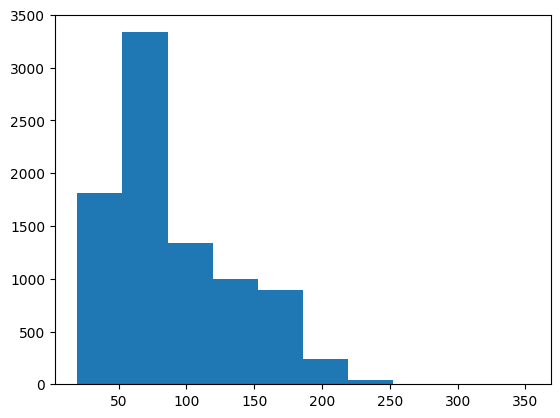

In [21]:
plt.hist(data2.EHGR.dropna())

(array([  34.,   98.,  599., 2628., 2816., 1976.,  379.,   85.,   29.,
           6.]),
 array([0.0051 , 0.07142, 0.13774, 0.20406, 0.27038, 0.3367 , 0.40302,
        0.46934, 0.53566, 0.60198, 0.6683 ]),
 <BarContainer object of 10 artists>)

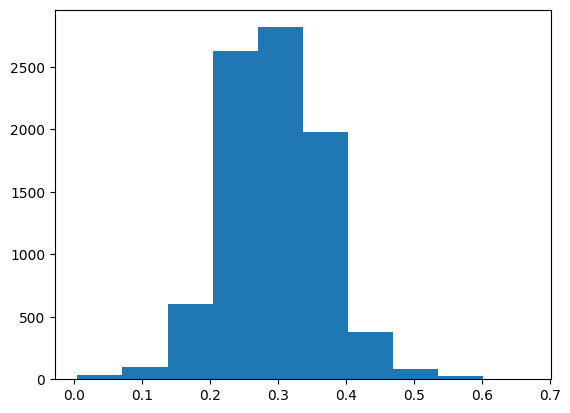

In [22]:
plt.hist(data2.NPHI.dropna())

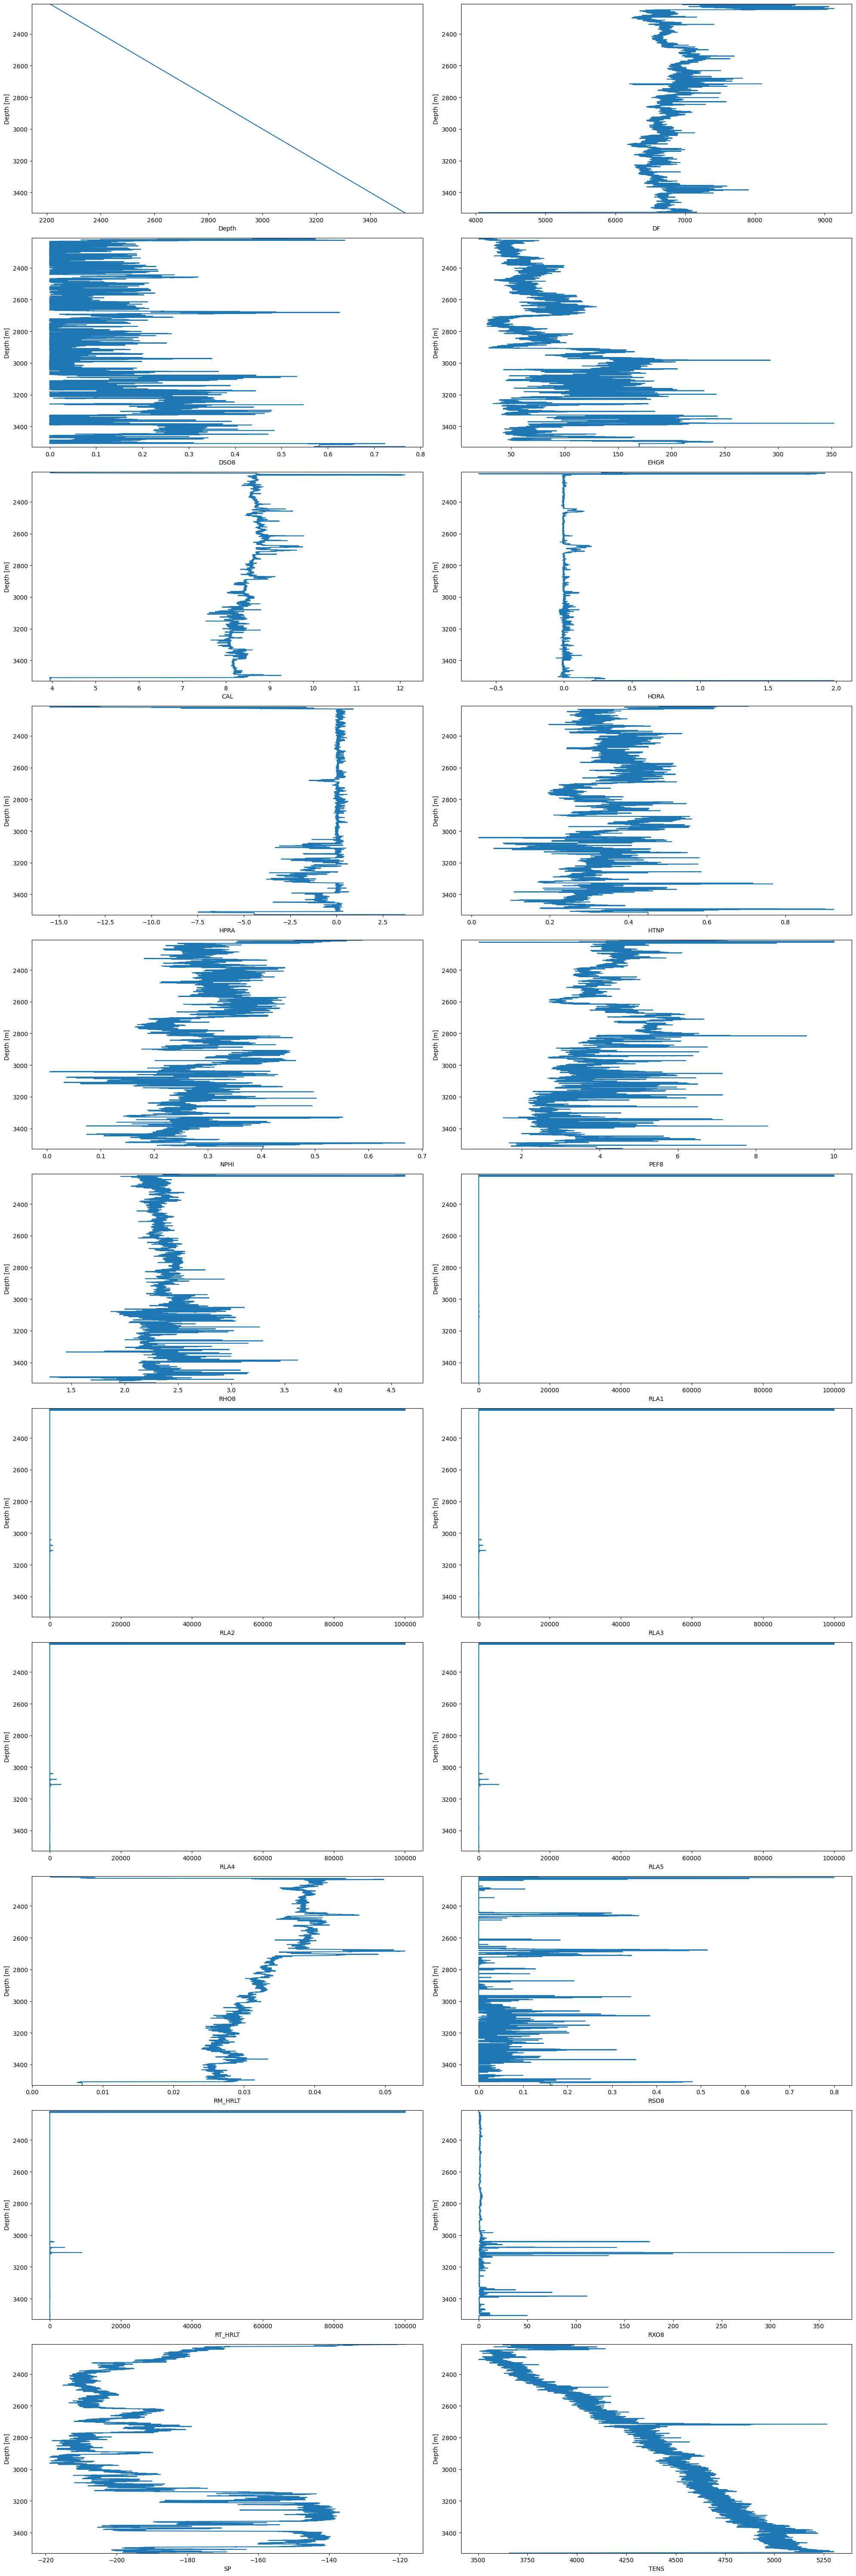

In [23]:
import matplotlib.pyplot as plt

columns_to_plot = ['Depth', 'DF', 'DSO8', 'EHGR', 'CAL', 'HDRA', 'HPRA', 'HTNP', 
                   'NPHI', 'PEF8', 'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 
                   'RM_HRLT', 'RSO8', 'RT_HRLT', 'RXO8', 'SP', 'TENS']

num_columns = len(columns_to_plot)
num_rows = num_columns // 2 + num_columns % 2  # Number of rows for subplots
plt.figure(figsize=(20, 60))

for i in range(num_columns):
    column = columns_to_plot[i]
    plt.subplot(num_rows,2, i + 1)
    plt.plot(data2[column], data2['Depth'])
    plt.ylim(data2['Depth'].max(), data2['Depth'].min())
    plt.xlabel(column)
    plt.ylabel('Depth [m]')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

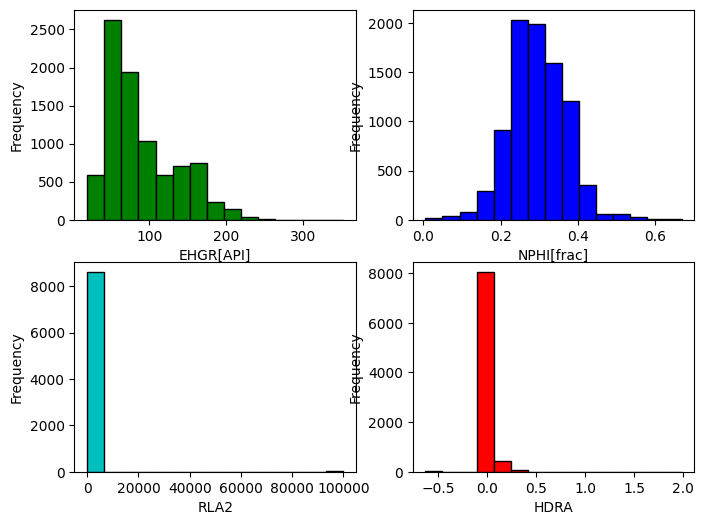

In [24]:
# Histogram plot of EHGR, NPHI, RLA2,HDRA
logs = data2.copy()
plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.hist(logs.EHGR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('EHGR[API]')
plt.ylabel('Frequency')
#plt.xlim(0,150)
#plt.grid(True)

plt.subplot(222)
plt.hist(logs.NPHI.dropna(), bins=15, color='b', edgecolor='k')
plt.xlabel('NPHI[frac]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(223)
plt.hist(logs.RLA2.dropna(), bins=15, color='c', edgecolor='k')
plt.xlabel('RLA2')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(224)
plt.hist(logs.HDRA.dropna(), bins=15, color='r', edgecolor='k')
plt.xlabel('HDRA')
plt.ylabel('Frequency')
#plt.grid(True)

#plt.subplots_adjust(top=1.2, bottom=.1, left=0.10, right=0.9, hspace=0.25, wspace=0.35)
#plt.savefig('histogram_v2.png', dpi =250, format = 'png')

In [28]:
# Histogram plot for all the given index
logs = data2.copy()
column_to_hist=['Depth', 'DF', 'DSO8', 'EHGR', 'CAL', 'HDRA', 'HPRA', 'HTNP', 
                   'NPHI', 'PEF8', 'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 
                   'RM_HRLT', 'RSO8', 'RT_HRLT', 'RXO8', 'SP', 'TENS']
num_of_colums=len(column_to_hist)
num_of_rows=num_of_colums//2+num_of_colums
for i in range (num_of_colums):
    column=num_of_colums
    plt.subplot(num_of_rows,2, i + 1)
    plt.hist(logs.[column].dropna(), data2['Depth'])
    plt.ylim(data2['Depth'].max(), data2['Depth'].min())
    plt.xlabel(column)
    plt.ylabel('Depth [m]')

plt.tight_layout()
plt.show()  
    

SyntaxError: invalid syntax (519564194.py, line 11)

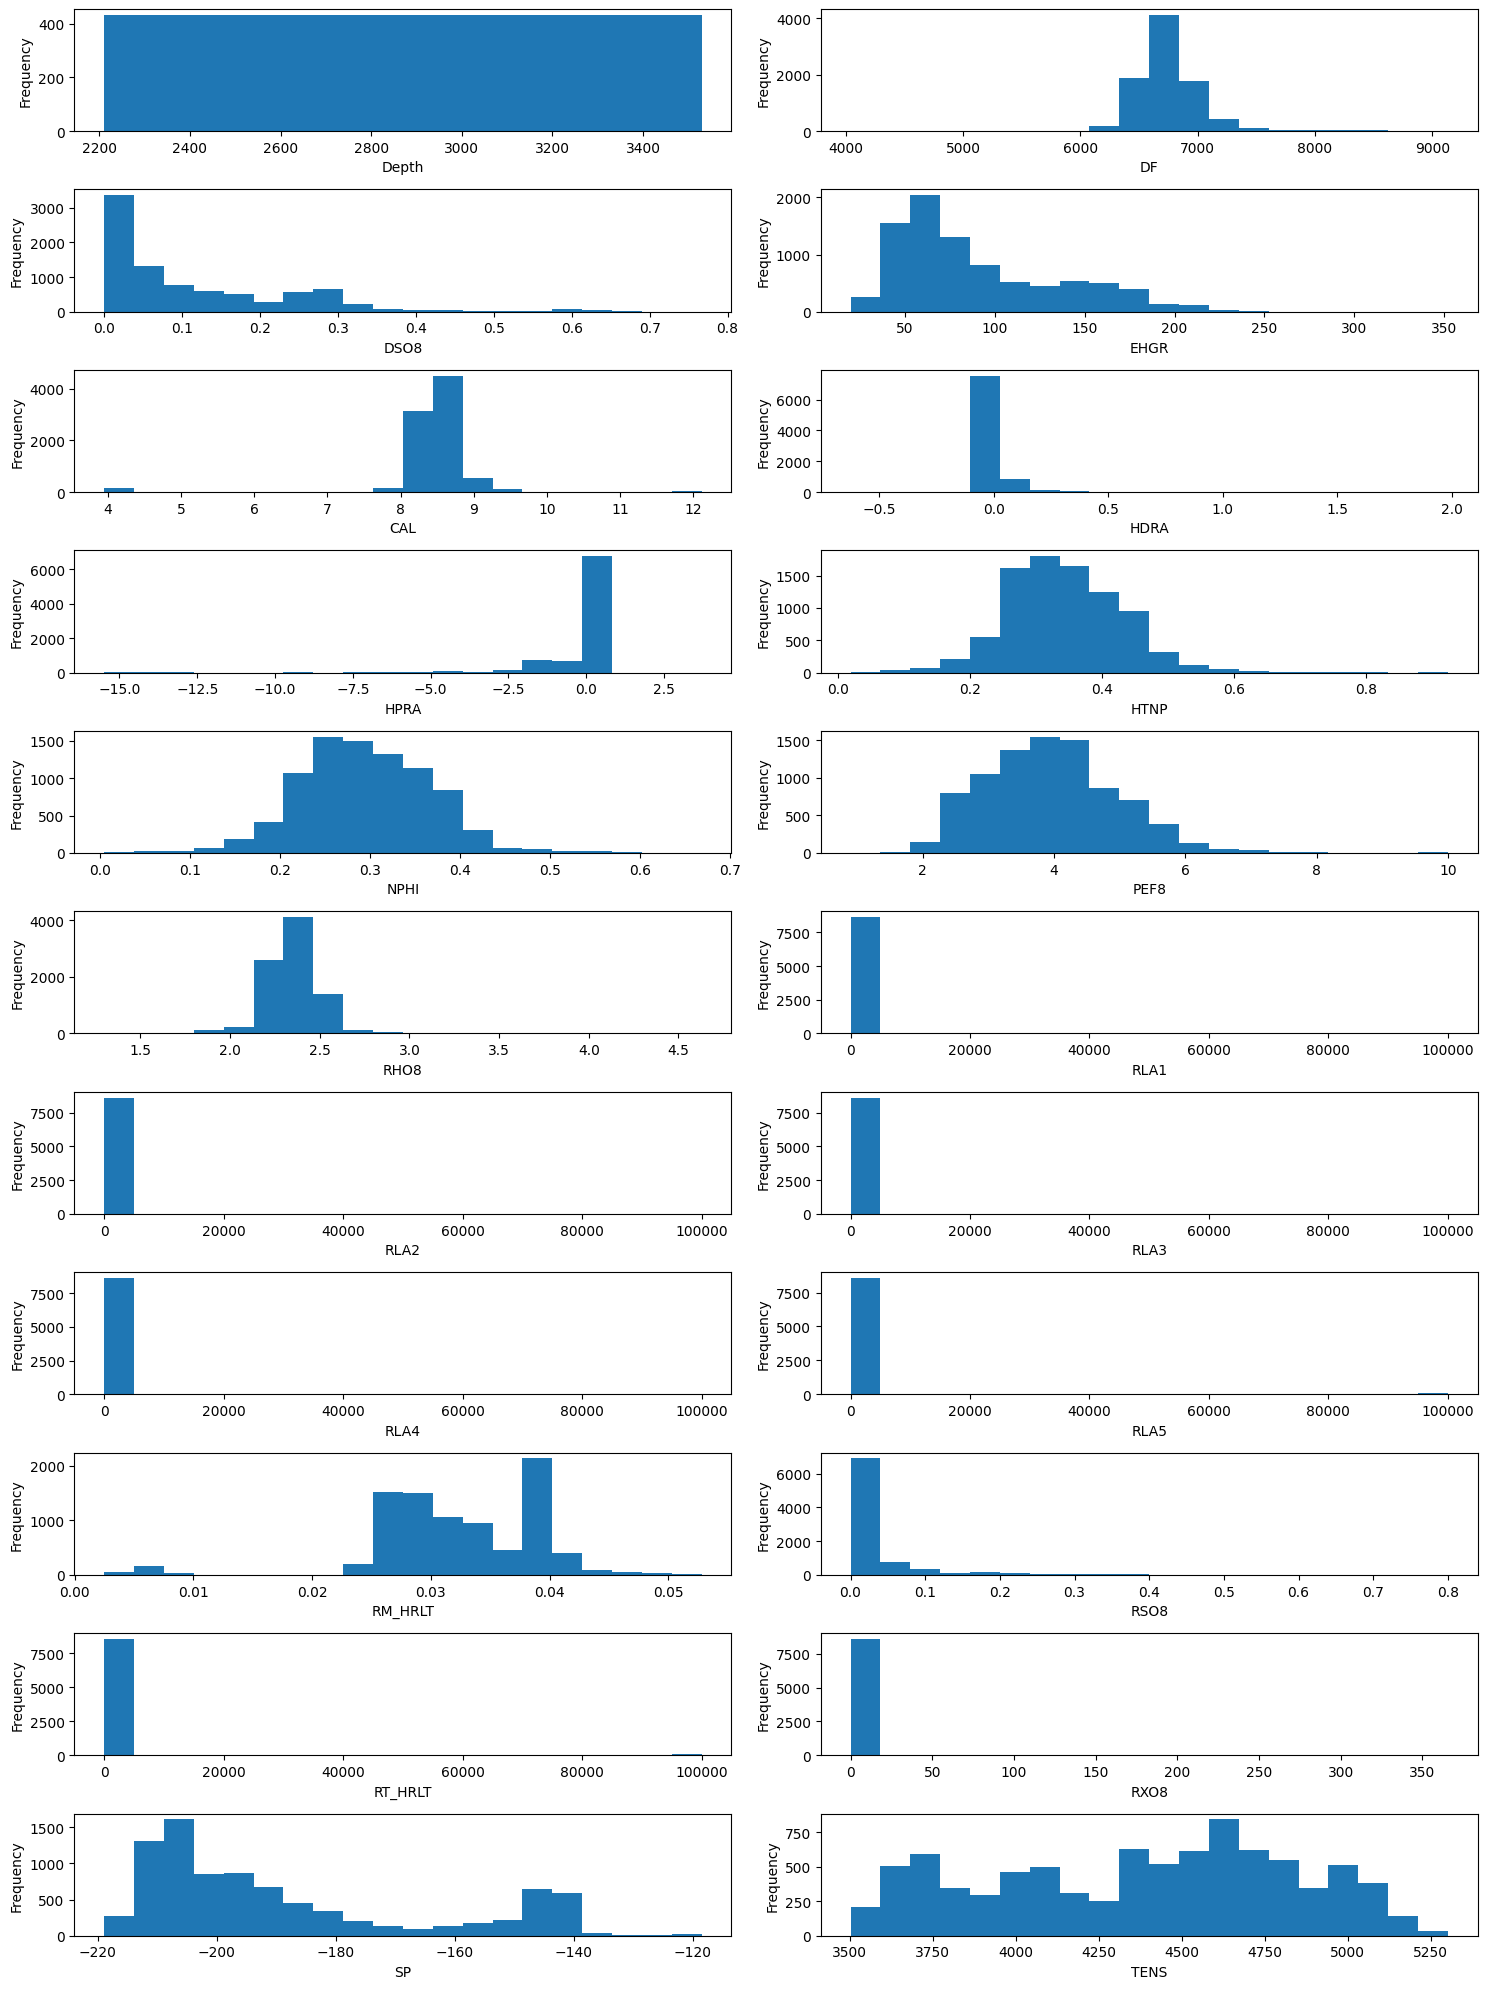

In [29]:
import matplotlib.pyplot as plt

logs = data2.copy()
column_to_hist = ['Depth', 'DF', 'DSO8', 'EHGR', 'CAL', 'HDRA', 'HPRA', 'HTNP', 
                  'NPHI', 'PEF8', 'RHO8', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5', 
                  'RM_HRLT', 'RSO8', 'RT_HRLT', 'RXO8', 'SP', 'TENS']
num_of_columns = len(column_to_hist)
num_of_rows = (num_of_columns + 1) // 2

plt.figure(figsize=(15, 20))

for i, column in enumerate(column_to_hist, start=1):
    plt.subplot(num_of_rows, 2, i)
    plt.hist(logs[column].dropna(), bins=20)  # Adjust number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
